<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/homeworks/HW3_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note**: I use chatGPT to improve the clarity of the questions. Please reach out if you are confused by what the question is asking.



### **Clone Business Analytics Repository**

In [1]:
!git clone https://github.com/pharringtonp19/business-analytics.git

Cloning into 'business-analytics'...
remote: Enumerating objects: 689, done.
remote: Counting objects: 100% (306/306), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 689 (delta 263), reused 216 (delta 205), pack-reused 383 (from 1)
Receiving objects: 100% (689/689), 8.85 MiB | 17.90 MiB/s, done.
Resolving deltas: 100% (391/391), done.


In [2]:
import jax
import jax.numpy as jnp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [13]:
df = pd.read_csv('/content/business-analytics/datasets/sportsref_download.csv')
df.head()

,Player,Team,Pos,G,MP,G.1,GS,MP.1,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Lindsay Allen,CHI,G,39,925,39,27,23.7,2.6,5.5,0.472,0.4,1.2,0.311,2.3,4.4,0.515,1.1,1.3,0.808,0.3,2.0,3.9,0.8,0.2,1.6,1.6,6.7
1,Rebecca Allen,PHO,F-G,18,447,18,18,24.8,2.9,7.1,0.417,1.4,3.9,0.352,1.6,3.1,0.500,0.1,0.2,0.667,0.7,3.9,1.1,0.9,0.7,1.0,1.9,7.4
2,Laeticia Amihere,ATL,F,15,73,15,0,4.9,0.4,1.6,0.250,0.0,0.0,NaN,0.4,1.6,0.250,0.3,1.1,0.294,0.8,1.7,0.2,0.1,0.2,0.4,0.5,1.1
3,Ariel Atkins,WAS,G,39,1175,39,39,30.1,5.4,12.5,0.432,1.9,5.5,0.346,3.5,7.0,0.500,2.2,2.5,0.848,0.9,3.5,3.1,1.4,0.4,2.3,2.8,14.9
4,Amy Atwell,PHO,F,5,41,5,0,8.2,0.6,2.2,0.273,0.4,1.8,0.222,0.2,0.4,0.500,0.2,0.2,1.000,0.6,0.8,0.6,0.0,0.2,0.4,0.6,1.8


### Question #0 (**Written**)

Which of the following concepts are you comfortable with?

(A) How to create a variable in Python

(B) How to add elements to a list

(C) How to write conditional statements

(D) How to filter a dataset based on a condition

(E) How to plot two variables

(F) How to use a for loop to apply a procedure across a list of elements

(G) How to "read" a data set via Pandas


**Answer**: All

### Question #1 (**Code**)
For each distribution shown in the figure, identify a column in the DataFrame that has a similar distribution. If you believe there isn’t a column with a similar distribution, you can skip that distribution. To plot a histogram of a column, use `plt.hist(df['col'])`.

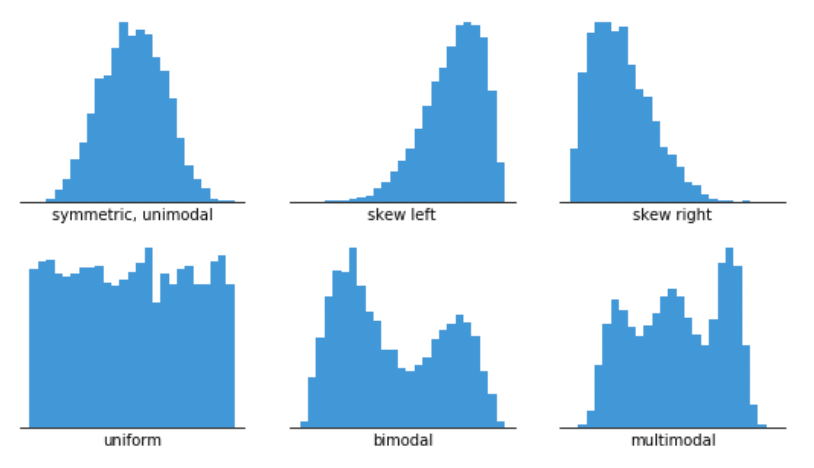

**Answer**:

Right Skew: FG

Left Skew: FT%

Uniform: MP.1

Symmetric: 2P%

G


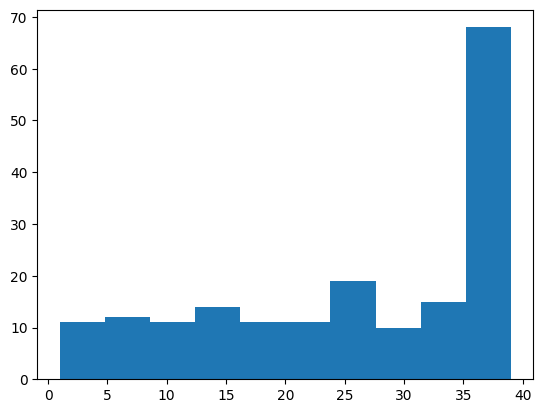

MP


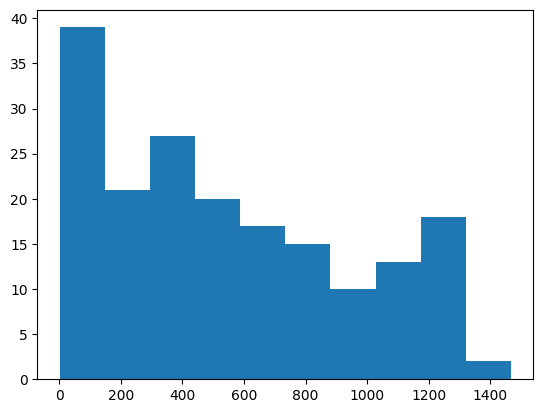

G.1


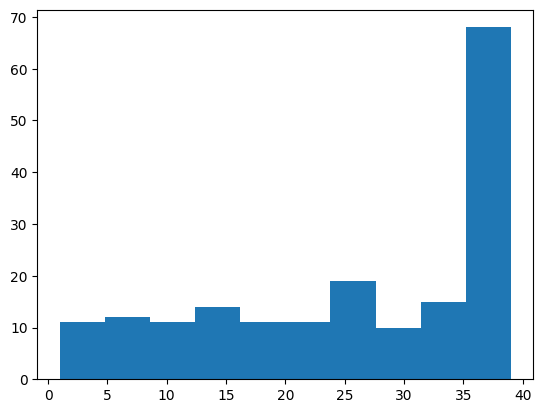

GS


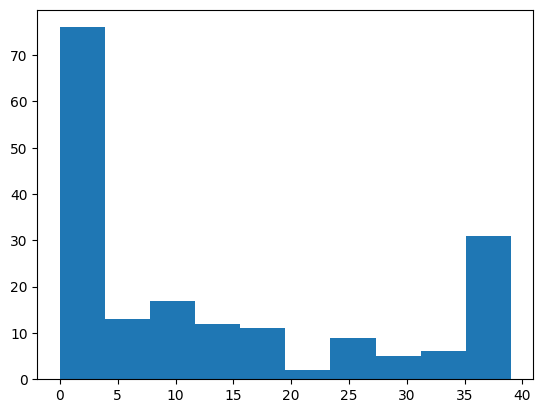

MP.1


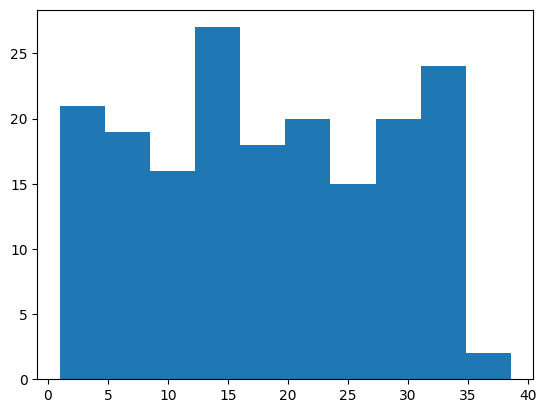

FG


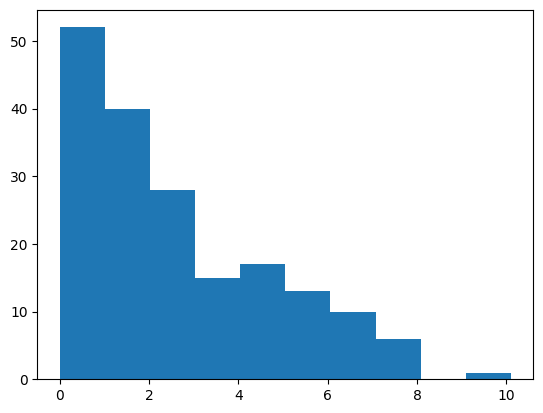

FGA


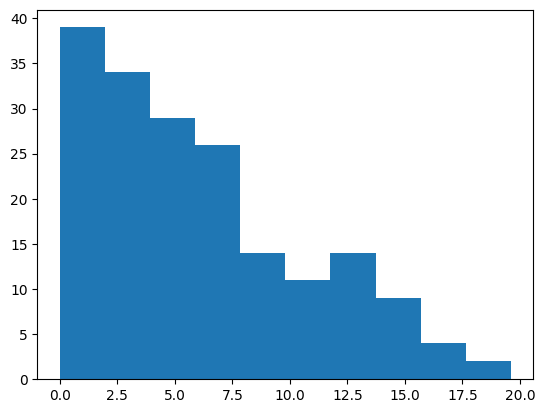

FG%


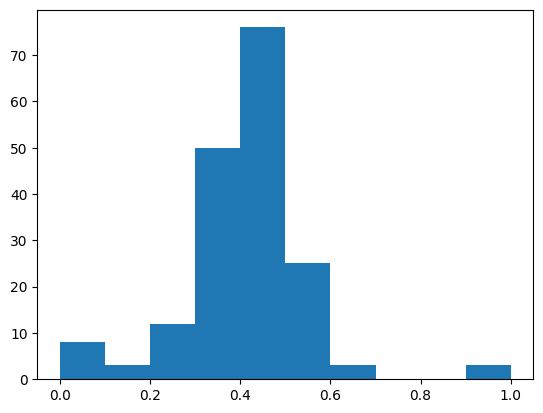

3P


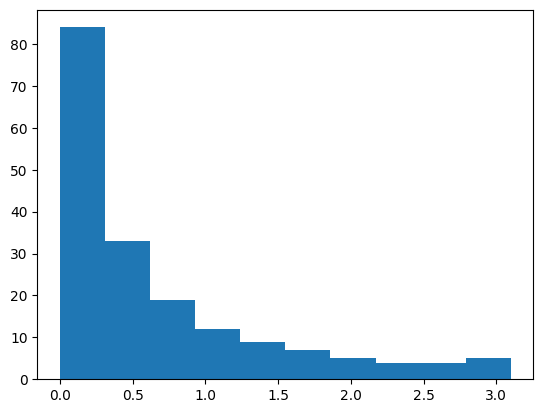

3PA


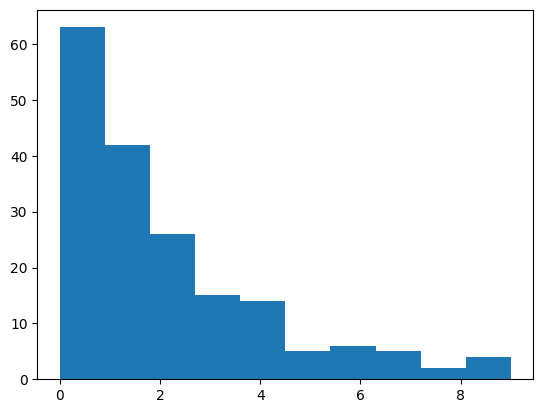

3P%


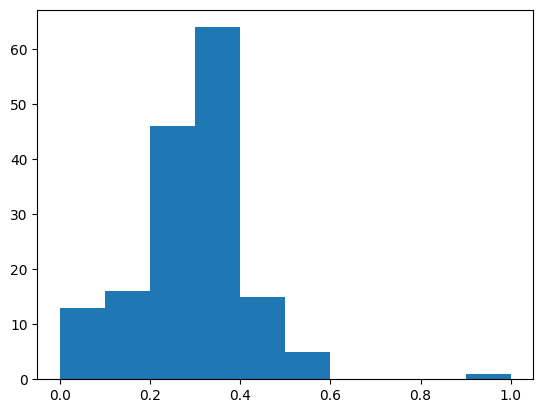

2P


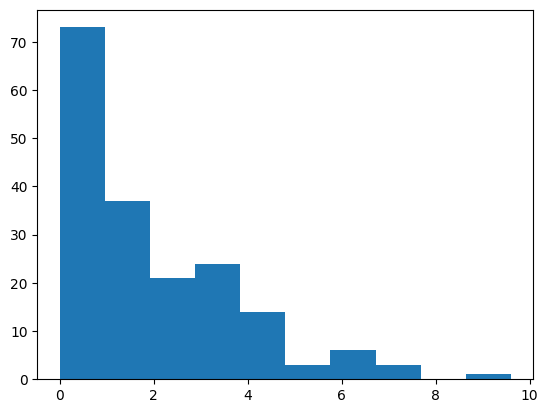

2PA


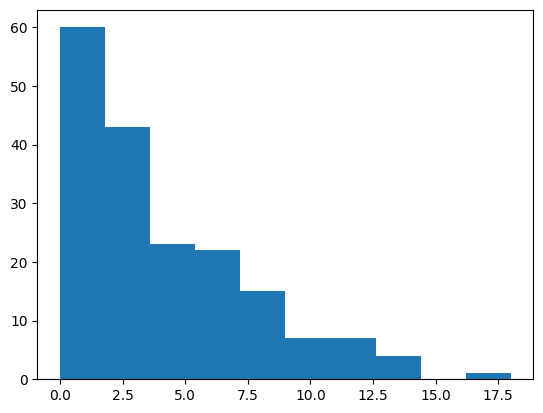

2P%


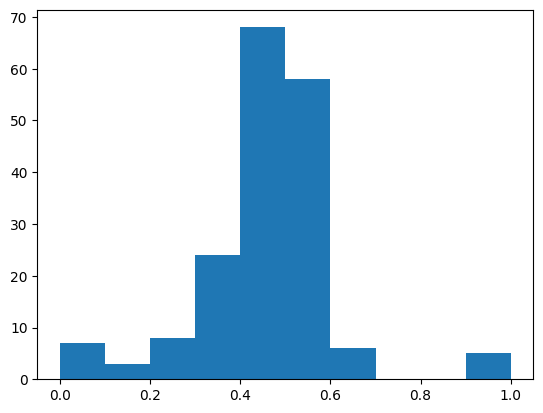

FT


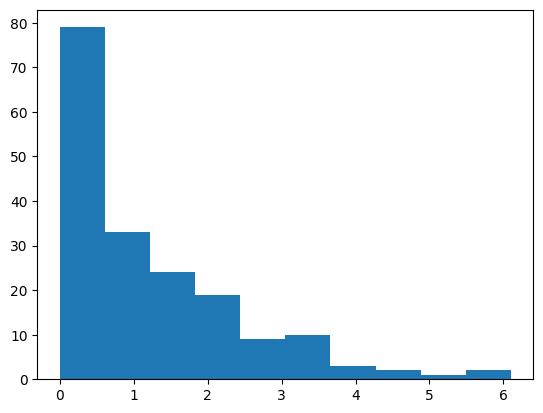

FTA


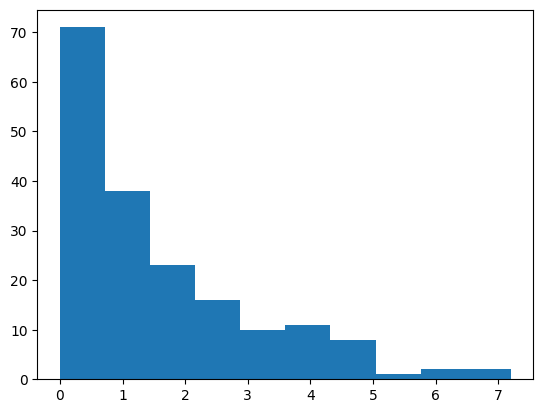

FT%


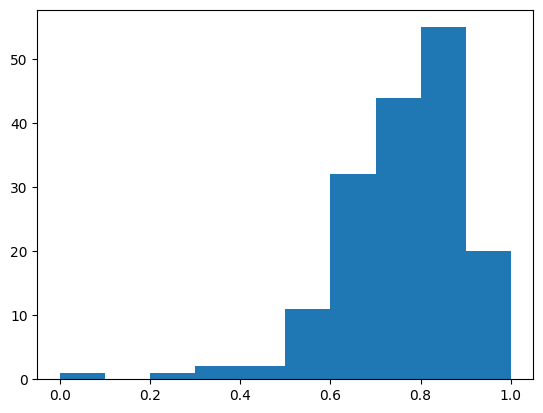

ORB


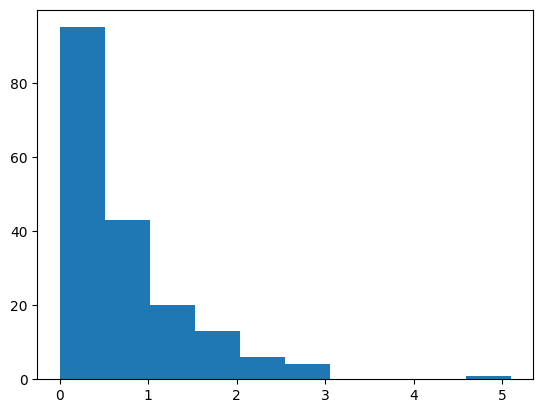

TRB


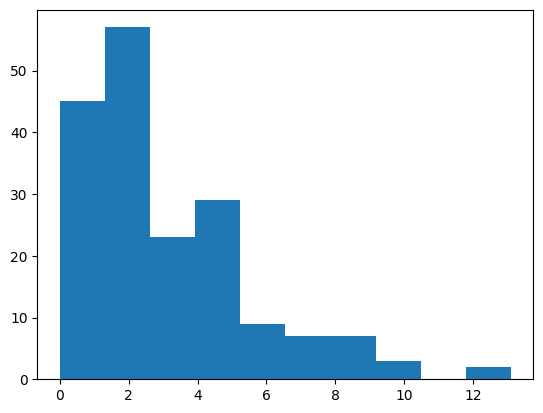

AST


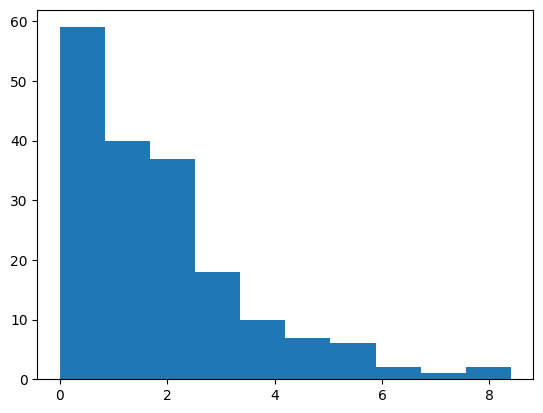

STL


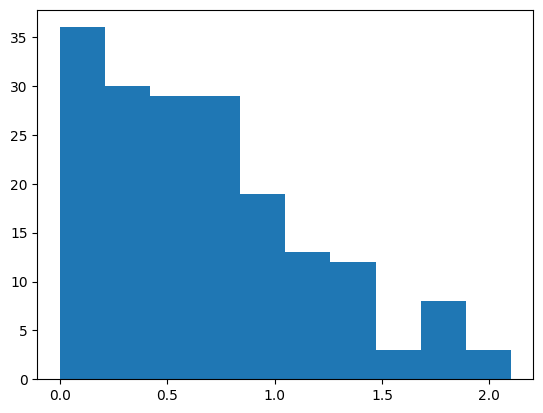

BLK


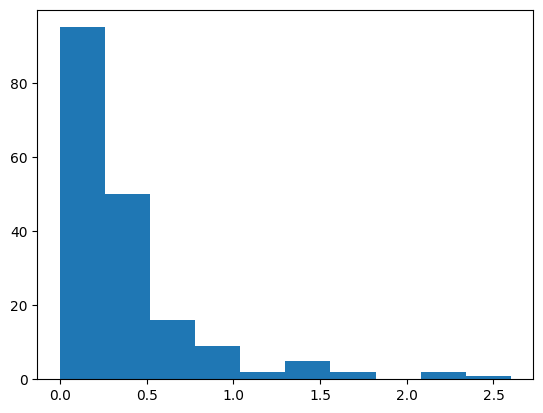

TOV


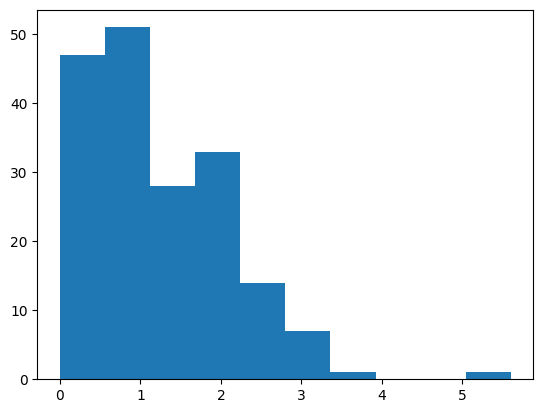

PF


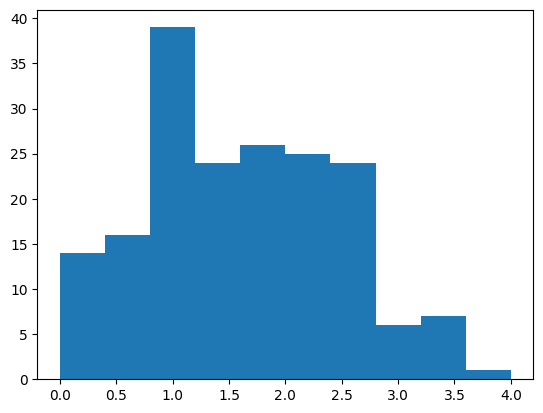

PTS


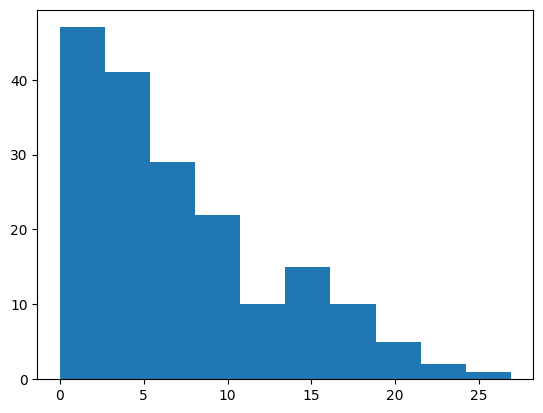

In [14]:
for col in df.columns[3:]:
  print(col)
  plt.hist(df[col])
  plt.show()

### Question #2 (**Written & Code**)

Based on the following code cell, explain when you would want to use `plt.hist` versus `plt.bar` to plot the distribution of a variable. Plot the distribution of **FT%**

**Answer**: We should use `plt.hist` when we're interested in the distribution of a continuous variable and `plt.bar` when we're interested in the distribution of a categorical variable.

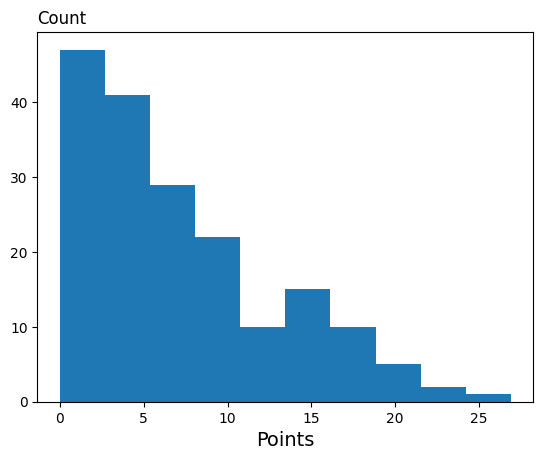

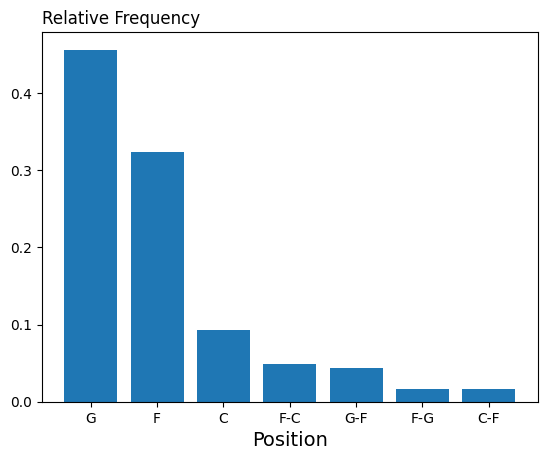

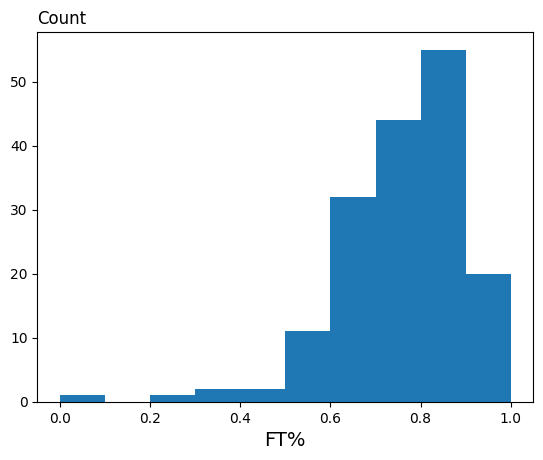

In [16]:
# Histogram
plt.hist(df['PTS'])
plt.title('Count', loc='left')
plt.xlabel('Points', size=14)
plt.show()

# Bar Plot
ft = df['Pos'].value_counts(normalize=True)
plt.bar(ft.index, ft.values)
plt.title('Relative Frequency', loc='left')
plt.xlabel('Position', size=14)
plt.show()

plt.hist(df['FT%'])
plt.title('Count', loc='left')
plt.xlabel('FT%', size=14)
plt.show()

### Question #3 (**Code**)

Using the `.groupby()` command, compute both the mean and median of **FG%** (Field Goal Percentage) for each position. Remember, the mean represents the average value of a variable, while the median is the middle value when the variable is sorted.

In [17]:
df.groupby(['Pos'])['FG%'].agg(['mean', 'median'])

,mean,median
Pos,,
C,0.464765,0.5060
C-F,0.412333,0.4300
F,0.413914,0.4480
F-C,0.467125,0.4820
F-G,0.408000,0.4140
G,0.384506,0.3910
G-F,0.403625,0.4085


### Question #4 (**Written** & **Code**)

Based on the examples below, why do you think the .describe() method produces different summary tables depending on the type of variable in the DataFrame? What happens when you run `df[['loan_amount_000s', 'loan_purpose_name']].describe()`? Does the result suprise you?

**Answer**: (1) As we discussed in class, the mean / expected value doesn't make sense for catgeorical variables. Therefore the `.describe()` method will return summary statistics that make sense for the type of variable that its called on.

When we call `.describe()` on two different kind of variables, the summary statistics won't align and so Python omits the second set of results. While initially surprising, this makes sense after reflecting on it.

In [18]:
df = pd.read_csv('/content/business-analytics/datasets/massachusetts_mortgages_2017.zip')
df['loan_purpose_name'].describe()

<ipython-input-18-1874b3cb3807>:1: DtypeWarning: Columns (34,36,38,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/business-analytics/datasets/massachusetts_mortgages_2017.zip')


,loan_purpose_name
count,129891
unique,3
top,Home purchase
freq,73823


In [19]:
df['loan_amount_000s'].describe()

,loan_amount_000s
count,129891.000000
mean,339.052444
std,239.565791
min,2.000000
25%,203.000000
50%,292.000000
75%,407.000000
max,8000.000000


### Question #5 (**Code**)

A **percentile** is a measure used in statistics to indicate the relative position of a value within a dataset. Specifically, the \( p \)-th percentile is the value below which \( p \)% of the data falls. For example, the 25th percentile (also known as the first quartile) is the value below which 25% of the data lies.

Here's a breakdown:

- **0th percentile**: The minimum value in the dataset.
- **25th percentile (1st quartile)**: 25% of the data is below this value.
- **50th percentile (2nd quartile or median)**: 50% of the data is below this value.
- **75th percentile (3rd quartile)**: 75% of the data is below this value.
- **100th percentile**: The maximum value in the dataset.

Percentiles are useful for understanding the distribution of data and identifying outliers or values that are unusually high or low relative to the rest of the dataset. We can compute the 25-th percentile of a column in pandas via `df['col'].quantile(0.25)`

**Task**: Write a function that takes in a value between 0 and 1, computes the corresponding \( p \)-th percentile of **FG%**.

In [23]:
df = pd.read_csv('/content/business-analytics/datasets/sportsref_download.csv')

In [24]:
def compute_percentile(x):
  return df['FG%'].quantile(x)

compute_percentile(0.5)

0.4135

### Question #6 (**Code**)

Using the list created for you below, compute the corresponding percentile by applying `map` to the function that you defined above. Plot the results.

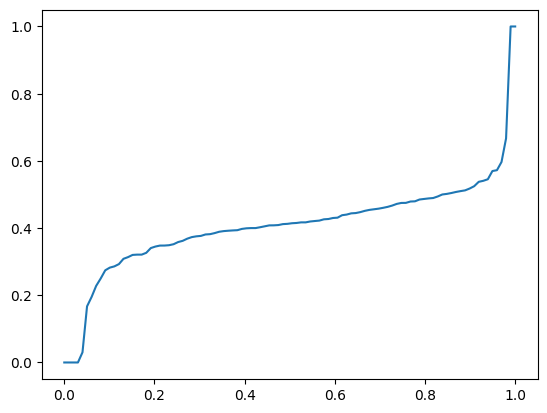

In [26]:
xs = list(np.linspace(0, 1, 100))
ys = list(map(compute_percentile, xs))
plt.plot(xs, ys)
plt.show()

### Question #7 (**Code**)

Imagine you work for a real estate investor who wants to analyze the distribution of different loan types in Massachusetts. Specifically, they are interested in understanding whether each type of loan—Conventional, FHA-insured, VA-guaranteed, and FSA/RHS-guaranteed—is over-represented, under-represented, or fairly represented in the dataset.

A loan type is considered over-represented if its relative frequency is greater than  $\frac{1}{K}$ , where  K  is the total number of loan types. For example, since there are four types of loans in this dataset,  K = 4 , and  $\frac{1}{K} = \frac{1}{4} = 0.25$ . If the relative frequency of Conventional loans is 0.3, it would be considered over-represented because 0.3 > 0.25.

Write Python code that indicates whether each loan type is over-represented, under-represented, or fairly-represented.

In [28]:
# Read in the data
df = pd.read_csv('/content/business-analytics/datasets/massachusetts_mortgages_2017.zip')

<ipython-input-28-28b9193b6dfd>:2: DtypeWarning: Columns (34,36,38,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/business-analytics/datasets/massachusetts_mortgages_2017.zip')


In [29]:
def classify(val, K):
  if val > (1/K):
    return 'over-represented'
  elif val < (1/K):
    return 'under-represented'
  else:
    return 'fairly represented'
relative_freq = df['loan_type_name'].value_counts(normalize=True)

for i in relative_freq.index:
  print(i, classify(relative_freq.loc[i], len(relative_freq)))


Conventional over-represented
FHA-insured under-represented
VA-guaranteed under-represented
FSA/RHS-guaranteed under-represented


### Question #8 (**Written**)

As we discussed in class, a probability space is a mathematical framework used to analyze and reason about uncertainty. The first element of a probability space is the sample space, which represents the set of all possible outcomes of an event. For example, when rolling a die, the sample space is \{1, 2, 3, 4, 5, 6\}, since these are all the possible results of a single roll.

With this in mind, consider the midterm exam. What would you identify as the sample space for the midterm?

**Answer**: A sample space could be the set of all possible versions of the midterm

### Question #9 (**Written**)

As we discussed in class, a random variable is a function that assigns a numerical value to each outcome in the sample space.

Given this understanding, and thinking about the midterm exam, how would you define a random variable of interest related to the exam?

**Anwer**: One example of a random variable would be the grade I would receive for each possible version of the midterm.

### Question #10 (**Code**)
Is it possible to re-write the code below using `map` instead of a for loop

**Answer**: Yes

In [ ]:
def f(x):
  return 1 if x%2 == 0 else -1

def experiment(key):
  outcome = jax.random.choice(key, a=jnp.array([1, 2, 3, 4, 5, 6]))
  value = f(outcome)
  return value

results = []
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
  key = jax.random.PRNGKey(i)
  value = experiment(key)
  results.append(value)

print(results)

[-1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1]


In [31]:
def f(x):
  return 1 if x%2 == 0 else -1

def experiment(i):
  key = jax.random.PRNGKey(i)
  outcome = jax.random.choice(key, a=jnp.array([1, 2, 3, 4, 5, 6]))
  value = f(outcome)
  return value

nums =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
results = list(map(experiment, nums))
print(results)

[-1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1]
